<a href="https://colab.research.google.com/github/luanapuka/Projetos_Jupyter-Collab/blob/main/Projeto_Gorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Análise de Gorjetas***

In [3]:
import pandas as pd

In [4]:
dados= pd.read_csv('gorjetas_atualizado.csv')
dados.shape[0]

3416

In [5]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Traduzindo os dados do inglês para o português

In [6]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [7]:
renomear={
    'total_bill': 'valor_da_conta',
     'tip': 'gorjeta',
     'dessert' : 'sobremesa',
     'day': 'dia_da_semana', 
     'time' : 'hora_do_dia', 
     'size': 'total_de_pessoas'
}
gorjetas = dados.rename(columns = renomear)
gorjetas.head()


,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [8]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [9]:
sim_nao ={
    'No': 'Não',
     'Yes': 'Sim'
}
gorjetas.sobremesa.map(sim_nao)

0       Não
1       Não
2       Não
3       Não
4       Não
       ... 
3411    Não
3412    Sim
3413    Sim
3414    Não
3415    Não
Name: sobremesa, Length: 3416, dtype: object

In [10]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [11]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [12]:
dias= {
    'Sun': 'Domingo',
    'Sat': 'Sábado',
    'Thur': 'Quinta', 
    'Fri': 'Sexta'
}
gorjetas.dia_da_semana.map(dias)

0       Domingo
1       Domingo
2       Domingo
3       Domingo
4       Domingo
         ...   
3411     Sábado
3412     Sábado
3413     Sábado
3414     Sábado
3415     Quinta
Name: dia_da_semana, Length: 3416, dtype: object

In [13]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias) 
gorjetas.sample(15)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
1141,26.907604,3.098010,Não,Domingo,Dinner,3
627,13.794264,2.995106,Não,Quinta,Lunch,2
3117,20.793139,3.249906,Sim,Domingo,Dinner,3
656,10.150945,1.766140,Sim,Sábado,Dinner,2
1963,32.794474,3.269560,Não,Domingo,Dinner,4
444,19.460588,3.633195,Sim,Quinta,Lunch,3
1423,16.125386,2.445807,Sim,Quinta,Lunch,2
3243,18.115821,2.725288,Não,Sábado,Dinner,3
1574,13.287910,2.983623,Não,Sábado,Dinner,2
3052,12.231934,2.300160,Não,Quinta,Lunch,2


In [14]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [15]:
hora = {
   'Dinner': 'Jantar',
   'Lunch': 'Almoço'
}
gorjetas.hora_do_dia= gorjetas.hora_do_dia.map(hora)
gorjetas.sample(10)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
676,16.966175,3.405189,Sim,Domingo,Jantar,3
1017,19.069429,2.757047,Não,Domingo,Jantar,2
1576,34.517681,2.738821,Não,Domingo,Jantar,3
3249,28.289075,3.587798,Não,Quinta,Almoço,4
2110,12.393955,2.522878,Não,Domingo,Jantar,2
2331,7.962978,1.185674,Não,Quinta,Almoço,2
460,27.074833,2.601074,Sim,Sábado,Jantar,5
2863,32.417842,2.381531,Sim,Domingo,Jantar,2
2761,25.316753,3.352375,Não,Quinta,Almoço,4
2063,7.819505,1.072697,Não,Sábado,Jantar,1


## Importando Seaborn

In [16]:
!pip install seaborn==0.9.0


     |████████████████████████████████| 208 kB 7.6 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [18]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: matplotlib, numpy, pandas, scipy
Required-by: missingno


## Análise 01 - Valor da conta e gorjeta

In [19]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

[Text(0, 0.5, ' Valor da gorjeta'), Text(0.5, 0, 'Valor da conta')]

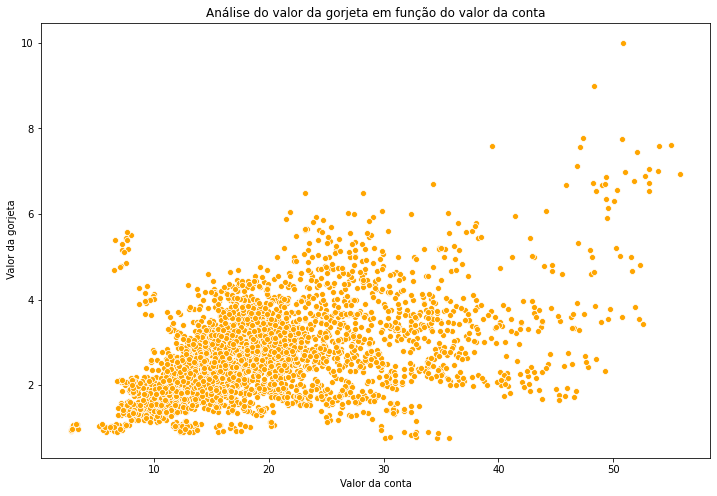

In [20]:
fig, ax = plt.subplots(figsize = ( 12 , 8 )) 
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y = 'gorjeta', data=gorjetas, color='orange')
valor_gorjeta.set_title('Análise do valor da gorjeta em função do valor da conta')
valor_gorjeta.set(xlabel='Valor da conta', ylabel=' Valor da gorjeta')

**Visualmente o valor da gorjeta aumenta de forma sútil, conforme o valor da conta aumenta**

In [21]:
print('A base de dados contem {} de registros\n'.format(gorjetas.shape[0]))
print('Registros não nulos\n')
gorjetas.count()

A base de dados contem 3416 de registros

Registros não nulos



valor_da_conta      3416
gorjeta             3416
sobremesa           3416
dia_da_semana       3416
hora_do_dia         3416
total_de_pessoas    3416
dtype: int64

**Abase de dados não contem valores nulos**

## Análise 02 - Sobremesa

Análise para verificar se existe relação entre o pedido da sobremesa e o valor da gorjeta 

In [22]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [23]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas
count,1302.000000,1302.000000,1302.000000
mean,20.800076,2.710137,2.408602
std,9.901358,1.162280,0.806690
min,2.799644,0.766203,1.000000
25%,13.495501,1.911661,2.000000
50%,17.917059,2.434354,2.000000
75%,26.807493,3.326298,3.000000
max,55.804318,10.000000,5.000000


In [24]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas
count,2114.000000,2114.000000,2114.000000
mean,19.223436,2.711837,2.668874
std,8.316030,1.024271,1.014848
min,6.533329,0.910509,1.000000
25%,13.281977,1.931135,2.000000
50%,17.736923,2.608222,2.000000
75%,22.749482,3.284578,3.000000
max,53.091371,9.000000,6.000000


**Analisando a média, não é possivel identificar com certeza se a gorjeta é influenciada nas contas em que a sobremesa foi pedida.**





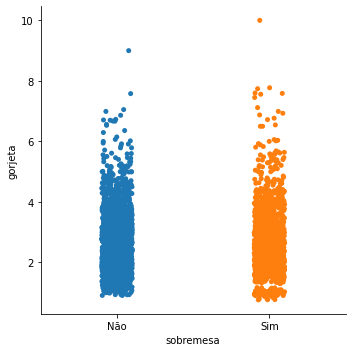

In [25]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas) 


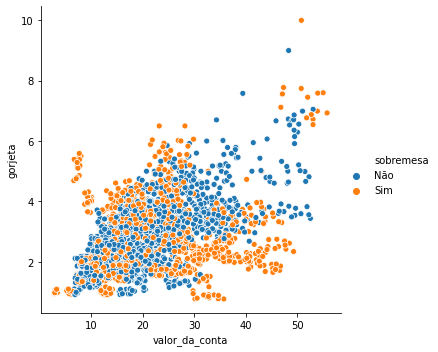

In [26]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

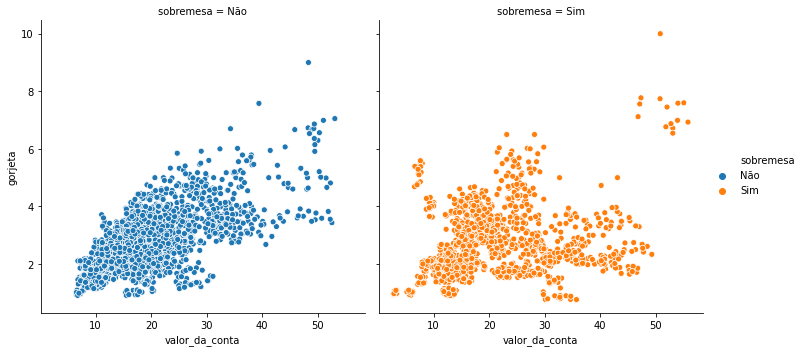

In [27]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

**Onde a sobremesa não foi pedida (azul), percebemos uma linha crescente e onde a sobremesa foi pedida (laranjado), está mais espalhado.**

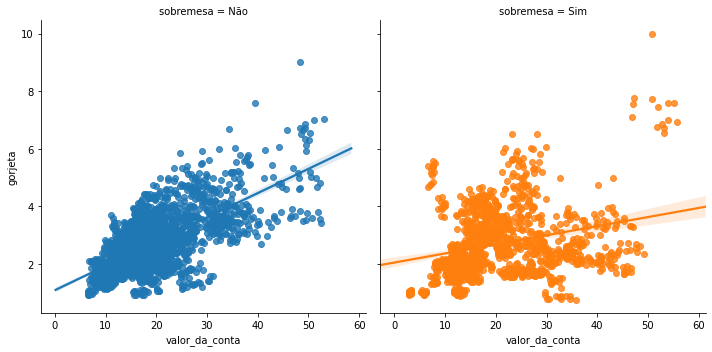

In [28]:
sns.lmplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

**Visualmente, existe  um diferença sutil no valor da gorjeta daqueles que pediram sobremesa e daqueles que não pediram sobremesa**

## Teste de hipótese - Sobremesa

**H<sup>null</sup>**
>**A distribuição da gorjeta é a mesma para o grupo que pediu e para o grupo que não pediu sobremesa**

**H<sup>alt</sup>**
>**A distribuição da gorjeta não é a mesma para o grupo que pediu e para o grupo que não pediu sobremesa**

In [29]:
from scipy.stats import ranksums

In [31]:
com_sobremesa =gorjetas.query("sobremesa == 'Sim'").valor_da_conta
com_sobremesa

56      38.010000
58      11.240000
60      20.290000
61      13.810000
62      11.020000
          ...    
3406    16.882586
3408    11.840990
3409    34.704251
3412    25.531567
3413    21.547132
Name: valor_da_conta, Length: 1302, dtype: float64

In [32]:
sem_sobremesa =gorjetas.query("sobremesa == 'Não'").valor_da_conta
sem_sobremesa

0       16.990000
1       10.340000
2       21.010000
3       23.680000
4       24.590000
          ...    
3407     9.681920
3410    38.663518
3411    26.330845
3414    18.966233
3415    18.079740
Name: valor_da_conta, Length: 2114, dtype: float64

In [33]:
r=ranksums(com_sobremesa, sem_sobremesa)
print ('O valor de p=value é {}'.format(r.pvalue))

O valor de p=value é 0.00035199100021610205


**H<sup>alt</sup>**
>**A distribuição da gorjeta não é a mesma para o grupo que pediu e para o grupo que não pediu sobremesa**

## Análise 03 - Dias da semana 

In [34]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

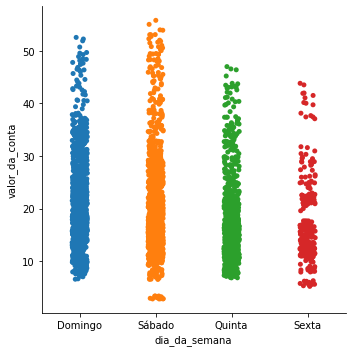

In [35]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

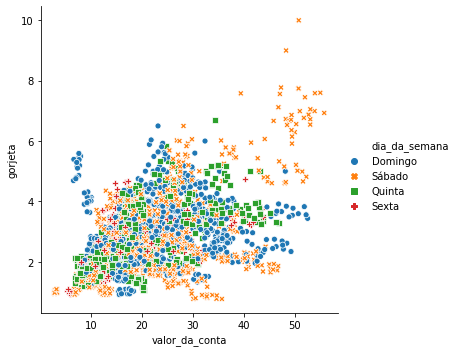

In [36]:
dias_semana= sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana',style = "dia_da_semana" ,  kind = "scatter", data=gorjetas)
dias_semana


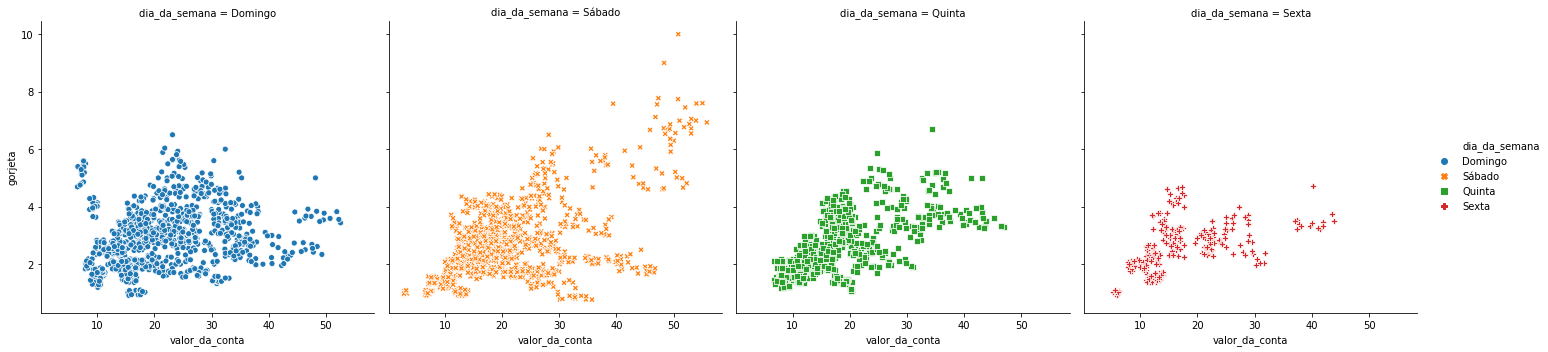

In [37]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana',style = "dia_da_semana" ,  kind = "scatter", col='dia_da_semana', data=gorjetas)

**Visualmente, a frequência de sábado e domingo são próximas.** 

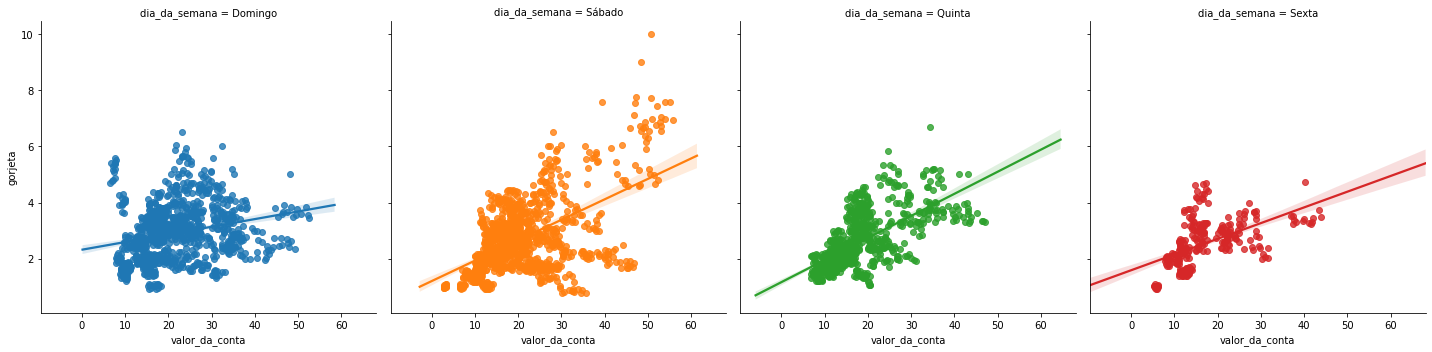

In [38]:
sns.lmplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [39]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts() #frequência

Frequência dos dias


Sábado     1218
Domingo    1064
Quinta      868
Sexta       266
Name: dia_da_semana, dtype: int64

## Teste de Hipótese - dias da semana




**H<sup>null</sup>**
>**A distribuição do valor da gorjeta é igual no Sábado e no Domingo**

**H<sup>alt</sup>**
>**A distribuição do valor da gorjeta não é igual no Sábado e no Domingo**



In [40]:
valor_conta_domingo= gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta
valor_conta_sabado= gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [41]:
valor_conta_domingo


0       16.990000
1       10.340000
2       21.010000
3       23.680000
4       24.590000
          ...    
3358    21.989267
3359    32.406667
3360    18.516067
3361    21.521342
3362    14.232724
Name: valor_da_conta, Length: 1064, dtype: float64

In [42]:
valor_conta_sabado


19      20.650000
20      17.920000
21      20.290000
22      15.770000
23      39.420000
          ...    
3410    38.663518
3411    26.330845
3412    25.531567
3413    21.547132
3414    18.966233
Name: valor_da_conta, Length: 1218, dtype: float64

In [43]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print ('O valor de p-value é {}'.format(r2.pvalue))

O valor de p-value é 0.0004435935681441821


In [44]:
ranksums(valor_conta_domingo, valor_conta_sabado)

RanksumsResult(statistic=3.512690684754087, pvalue=0.0004435935681441821)

**H<sup>alt</sup>**
>**A distribuição do valor da gorjeta não é igual no Sábado e no Domingo.**